In [1]:
!pip install scikeras

In [2]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data and Examine

In [4]:
data= pd.read_csv("Alphabets_data.csv")

In [5]:
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [8]:
data.shape

(20000, 17)

In [9]:
data.nunique()

letter    26
xbox      16
ybox      16
width     16
height    16
onpix     16
xbar      16
ybar      16
x2bar     16
y2bar     16
xybar     16
x2ybar    16
xy2bar    16
xedge     16
xedgey    16
yedge     16
yedgex    16
dtype: int64

In [10]:
data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


C:\Users\Dell\AppData\Local\Temp\ipykernel_11268\1724378054.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

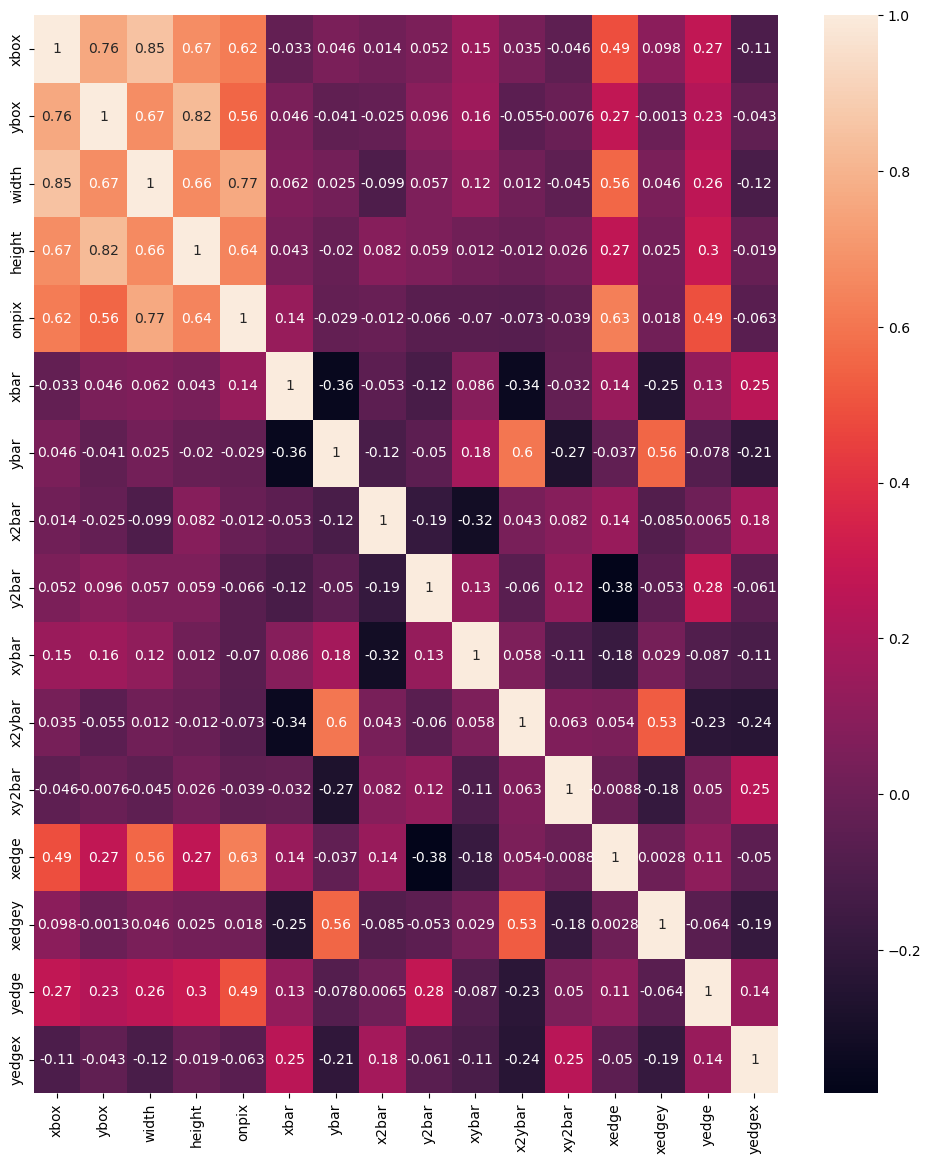

In [17]:
plt.figure(figsize=(12,14))
sns.heatmap(data.corr(),annot=True)

### Split and Scale Data

In [18]:
X = data.drop("letter", axis=1)
y = data["letter"]

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical)

### Build Model

In [30]:
from tensorflow import keras
def build_model(learning_rate=1e-2, activation='relu', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    model.add(Dense(26, activation='softmax')) 
    opt=keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### Train Model

In [31]:
model = build_model()
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5753 - loss: 1.4440 - val_accuracy: 0.8112 - val_loss: 0.5455
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8330 - loss: 0.5150 - val_accuracy: 0.8425 - val_loss: 0.4581
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8782 - loss: 0.3759 - val_accuracy: 0.8569 - val_loss: 0.4219
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8894 - loss: 0.3318 - val_accuracy: 0.8775 - val_loss: 0.3829
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9034 - loss: 0.3007 - val_accuracy: 0.8863 - val_loss: 0.3420
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9118 - loss: 0.2745 - val_accuracy: 0.8850 - val_loss: 0.3589
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9090 - loss: 0.2940 - val_accuracy: 0.9119 - val_loss: 0.2895
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9088 - loss: 0.2940 - val_accuracy: 0.

### Interpretation
Model accuracy climbed steadily from 57.5 % to 92.4 %, while validation accuracy improved from 81.1 % to 91.3 %. Validation loss fell by half overall, bottoming near 0.256, with a small uptick later, indicating strong convergence and minor overfitting risk towards final epoch.


### Predict

In [32]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=label_encoder.classes_))


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.91525

Classification Report:
               precision    recall  f1-score   support

           A       0.96      0.98      0.97       158
           B       0.85      0.95      0.90       153
           C       0.86      0.98      0.92       147
           D       0.94      0.90      0.92       161
           E       0.87      0.90      0.88       154
           F       0.89      0.87      0.88       155
           G       0.88      0.76      0.82       155
           H       0.83      0.80      0.82       147
           I       0.95      0.95      0.95       151
           J       0.95      0.94      0.94       149
           K       0.92      0.88      0.90       148
           L       0.95      0.95      0.95       152
           M       0.96      0.96      0.96       158
           N       0.97      0.92      0.95       157
           O       0.95      0.91      0.93       151
           P       0.87      0.96      0.91       1

### Interpretation
The model achieved 92% accuracy on the test set. Most classes performed well, with precision, recall, and F1-scores above 0.90 for many. Minor dips in recall for classes G, H, and T suggest potential confusion or class imbalance needing further tuning.

### Hyperparameter Tuning

In [53]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

In [54]:
keras_clf = KerasClassifier(
    model=build_model,
    epochs=50,
    batch_size=128,
    verbose=0
)

### GridSearch Approach

In [58]:
param_grid = [{
    "model__learning_rate": [1e-2, 5e-3, 1e-3],
    "model__activation":    ['relu', 'tanh', 'elu'],
    "model__dropout_rate":  [0.0, 0.3, 0.5]
}]

In [59]:
grid = GridSearchCV(
    estimator=keras_clf,
    param_grid=param_grid,
    cv=3,               
    scoring='accuracy',
    n_jobs=-1,
    verbose=2         
)

In [60]:
grid.fit(X_train, y_train)

print("Best mean CV accuracy:", grid.best_score_)
print("Best hyper-parameters:", grid.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best mean CV accuracy: 0.9338749330813304
Best hyper-parameters: {'model__activation': 'elu', 'model__dropout_rate': 0.0, 'model__learning_rate': 0.005}


### Interpretataion
Grid search identified the best model with 93.39% mean cross-validation accuracy using the ELU activation function, no dropout, and a learning rate of 0.005. This combination outperformed others across 3-fold CV, indicating strong generalization without regularization.


In [64]:
from tensorflow import keras
def build_model(learning_rate=0.005 ,activation='elu', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation=activation))
    model.add(Dense(26, activation='softmax')) 
    opt=keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5577 - loss: 1.5089 - val_accuracy: 0.7900 - val_loss: 0.6896
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8107 - loss: 0.6210 - val_accuracy: 0.8350 - val_loss: 0.5128
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8530 - loss: 0.4515 - val_accuracy: 0.8712 - val_loss: 0.4188
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8735 - loss: 0.3957 - val_accuracy: 0.8775 - val_loss: 0.3590
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8901 - loss: 0.3362 - val_accuracy: 0.8981 - val_loss: 0.3485
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9085 - loss: 0.2721 - val_accuracy: 0.9006 - val_loss: 0.2996
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9114 - loss: 0.2672 - val_accuracy: 0.8969 - val_loss: 0.3273
Epoch 8/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9232 - loss: 0.2373 - val_accuracy: 0.

In [65]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=label_encoder.classes_))


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.9345

Classification Report:
               precision    recall  f1-score   support

           A       0.98      0.97      0.97       158
           B       0.91      0.91      0.91       153
           C       0.91      0.95      0.93       147
           D       0.96      0.88      0.92       161
           E       0.87      0.92      0.90       154
           F       0.94      0.91      0.92       155
           G       0.83      0.93      0.88       155
           H       0.87      0.88      0.88       147
           I       0.97      0.91      0.94       151
           J       0.89      0.97      0.93       149
           K       0.94      0.89      0.91       148
           L       0.95      0.93      0.94       152
           M       0.97      1.00      0.98       158
           N       0.98      0.96      0.97       157
           O       0.92      0.95      0.94       151
           P       0.99      0.93      0.96       16

### Conclusion

Model tuned with ELU activation achieves 93.45% test accuracy, validating grid-search gains. Precision, recall, and F1 average about 0.93, indicating balanced multiclass performance.

Letters M, U, N, Z, and A exceed 0.97 on every metric, with M perfect in recall. Minor weaknesses appear for D, E, G, R, and X, where precision or recall slumps to high-80s, suggesting specific confusions. 

Macro and weighted averages match, reflecting good class balance. Zero dropout helped the optimiser’s 0.005 learning rate converge cleanly.
